<a href="https://colab.research.google.com/github/tomonari-masada/course2023-sml/blob/main/2d_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2次元の可視化

## UMAPのインストール

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=a1c1c6dd28e2ea713f73d4a1229eb71523c5c504040eeb91f576eef0a5d799ef
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=f1393afd7805a0746082284b82c3beb887dc39869bbe955fc0061b4499547995
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
import seaborn as sns
import umap

%config InlineBackend.figure_formats = {'png', 'retina'}

## digits data

In [3]:
digits = datasets.load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

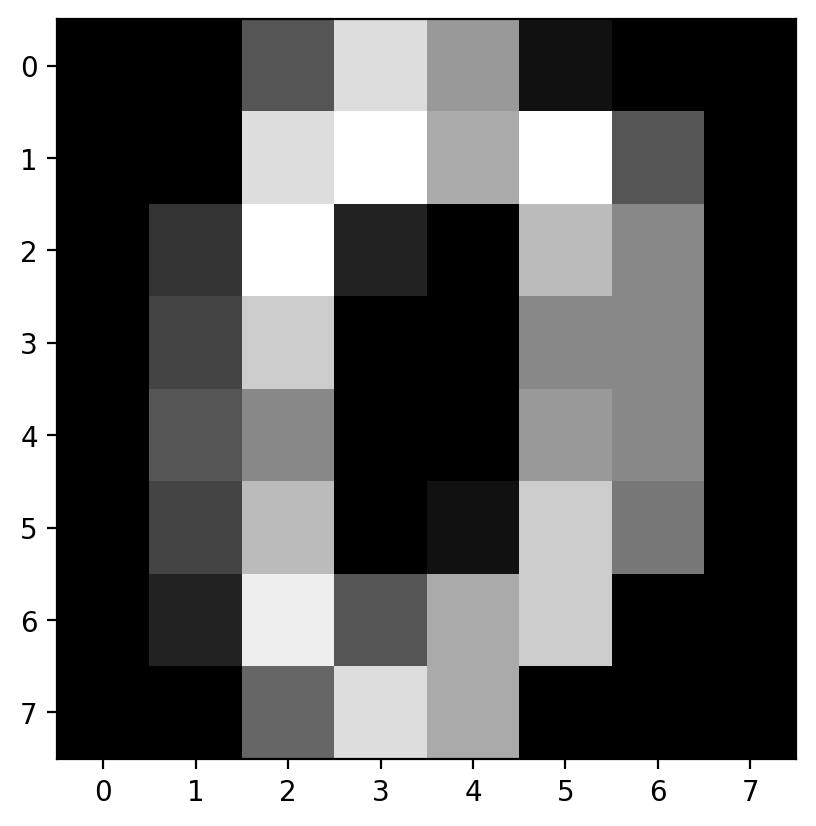

In [6]:
plt.imshow(digits.data[0].reshape(8, -1), cmap="gray");

In [7]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 可視化のためのヘルパ関数
* もっと凝った可視化をしたいなら、下記を参照。
 * https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

In [8]:
def scatter_plot(embedding, target, cmap=plt.get_cmap("tab10"), ax=None):
  for color in np.unique(target):
    indices = digits.target == color
    if ax is None:
      plt.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)
    else:
      ax.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)

## UMAP
* https://umap-learn.readthedocs.io/en/latest/parameters.html
  * パラメータ`n_neighbors`を変えると可視化がどう変わるか。
  * パラメータ`min_dist`を変えると可視化がどう変わるか。


### デフォルトの設定で可視化

In [9]:
%%time
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(digits.data)

CPU times: user 18.3 s, sys: 208 ms, total: 18.5 s
Wall time: 26.3 s


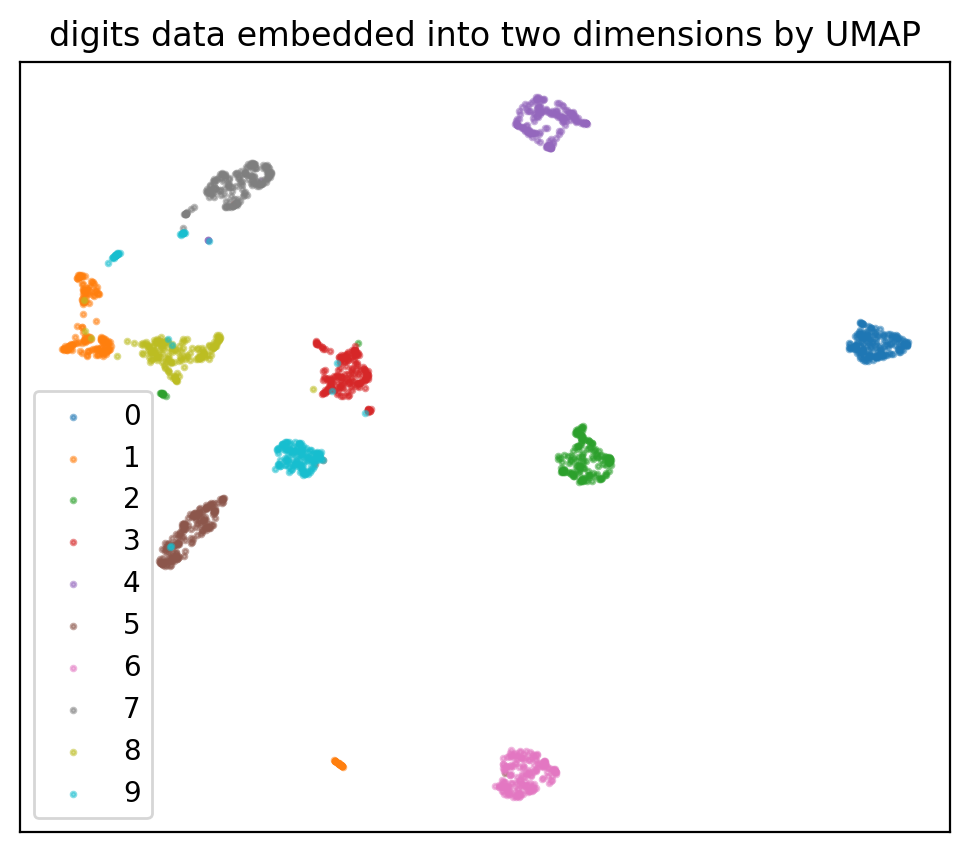

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
scatter_plot(embedding, digits.target)
plt.setp(ax, xticks=[], yticks=[])
plt.legend()
plt.title("digits data embedded into two dimensions by UMAP");

* 例えば、「"2"（緑）は"8"（黄）より"3"（赤）に近い」と言ってしまって良いか？

### (1) `n_neighbors`を変更する
* デフォルトの値は15

In [11]:
def draw_umap(n_neighbors=15, min_dist=0.1, title=""):
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
  u = reducer.fit_transform(digits.data)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter_plot(u, digits.target, ax=ax)
  plt.setp(ax, xticks=[], yticks=[])
  #plt.legend()
  plt.title(title, fontsize=15);

n_neighbors = 5
n_neighbors = 10
n_neighbors = 20
n_neighbors = 50
n_neighbors = 100
n_neighbors = 200


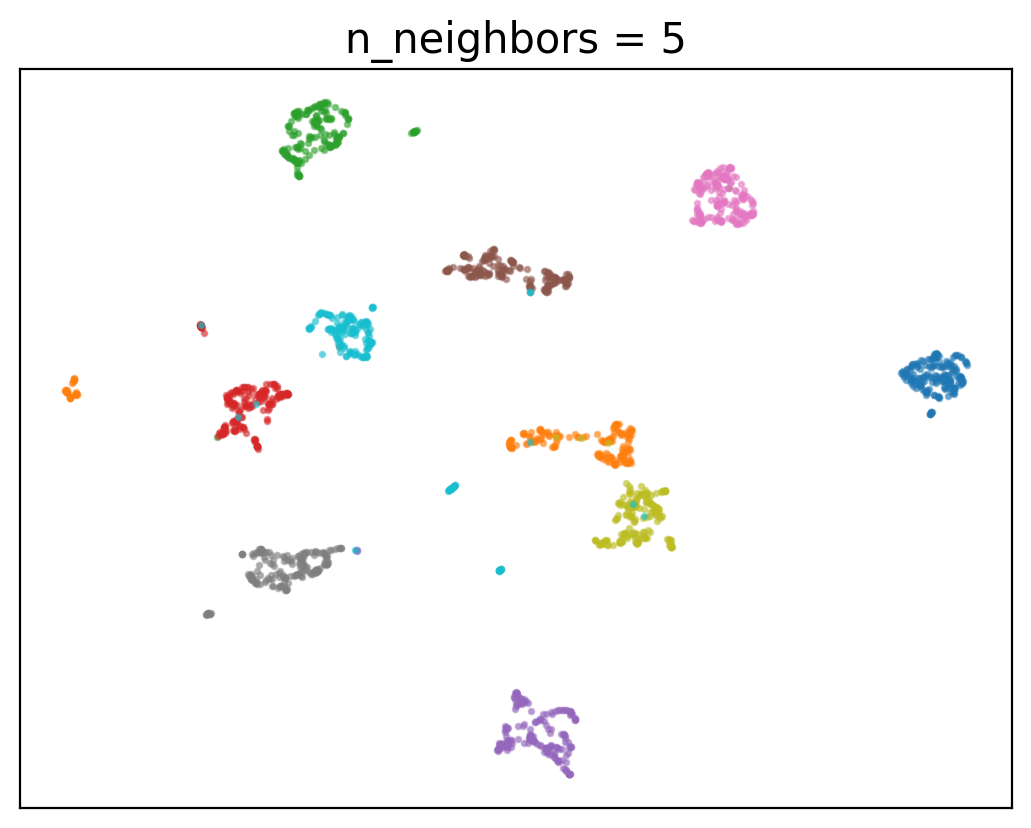

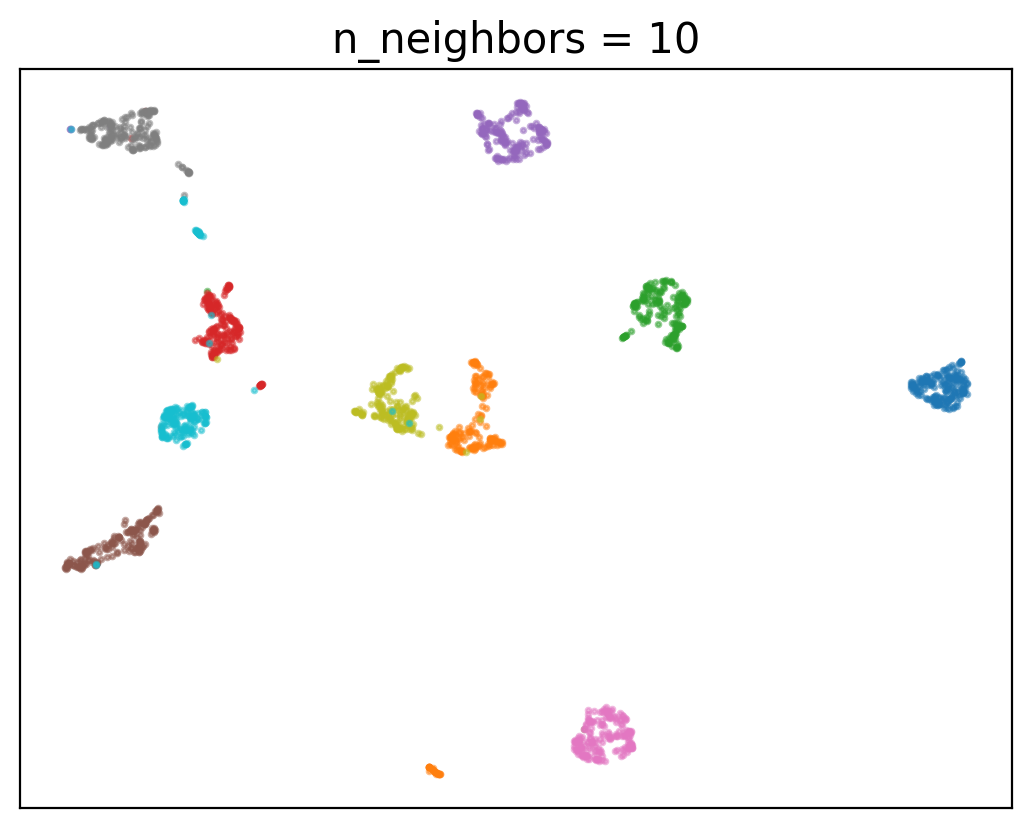

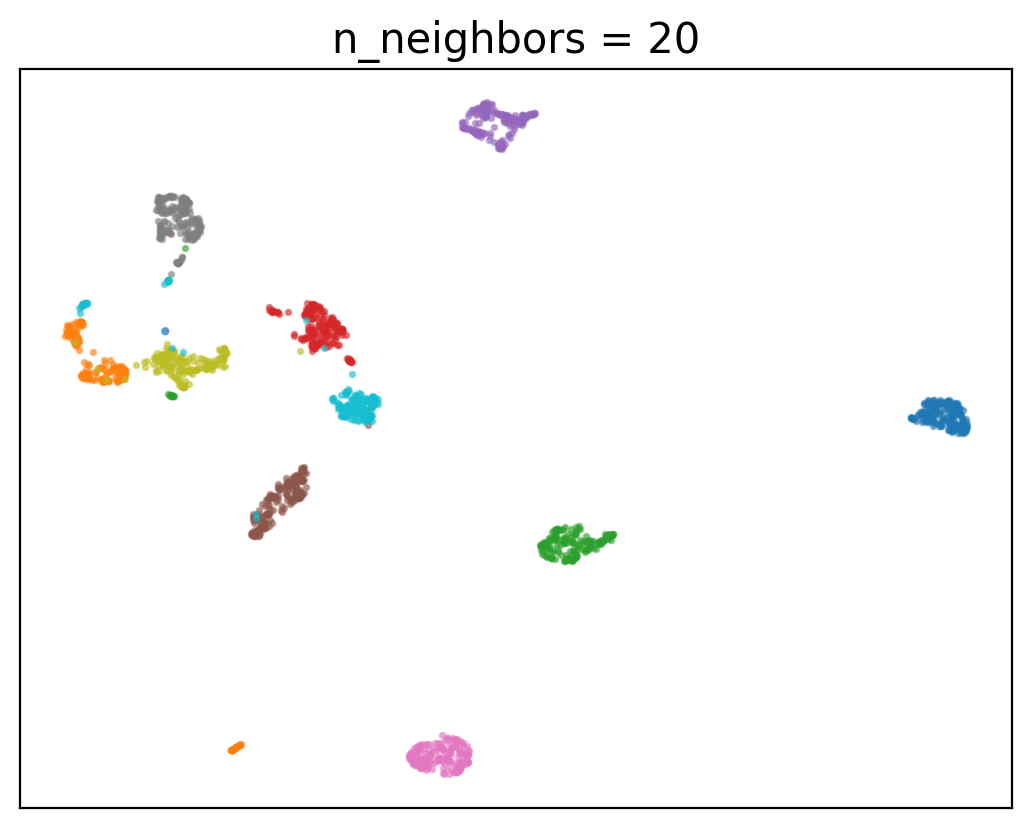

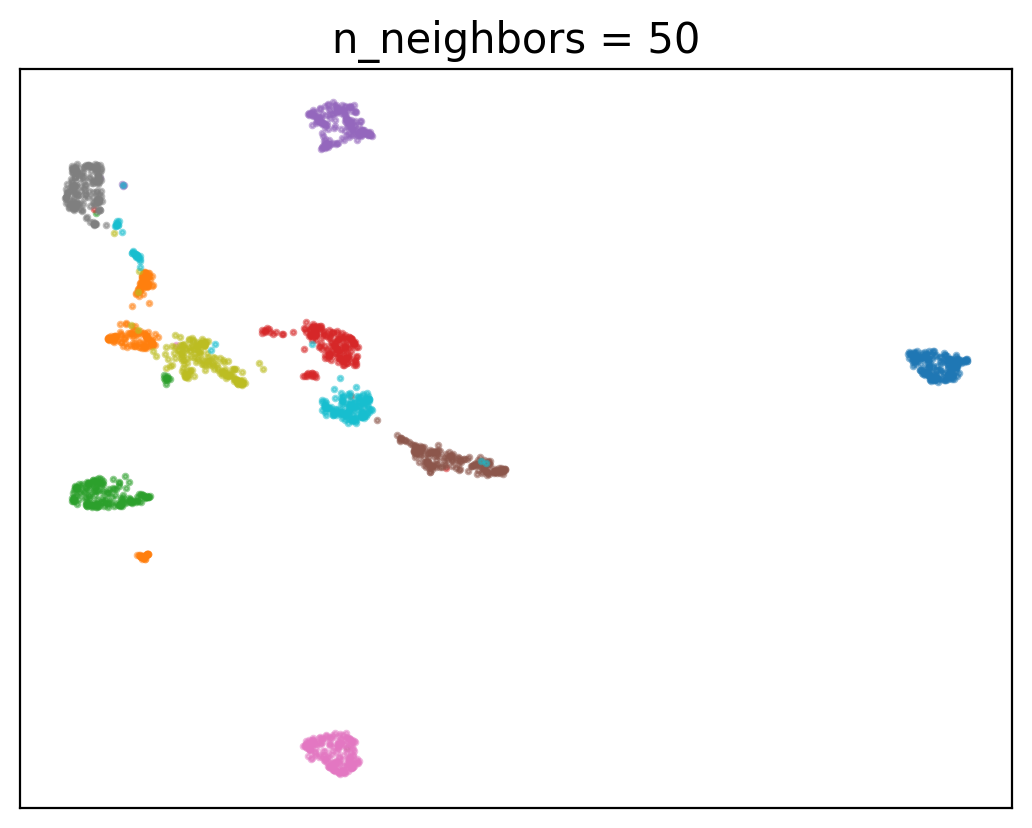

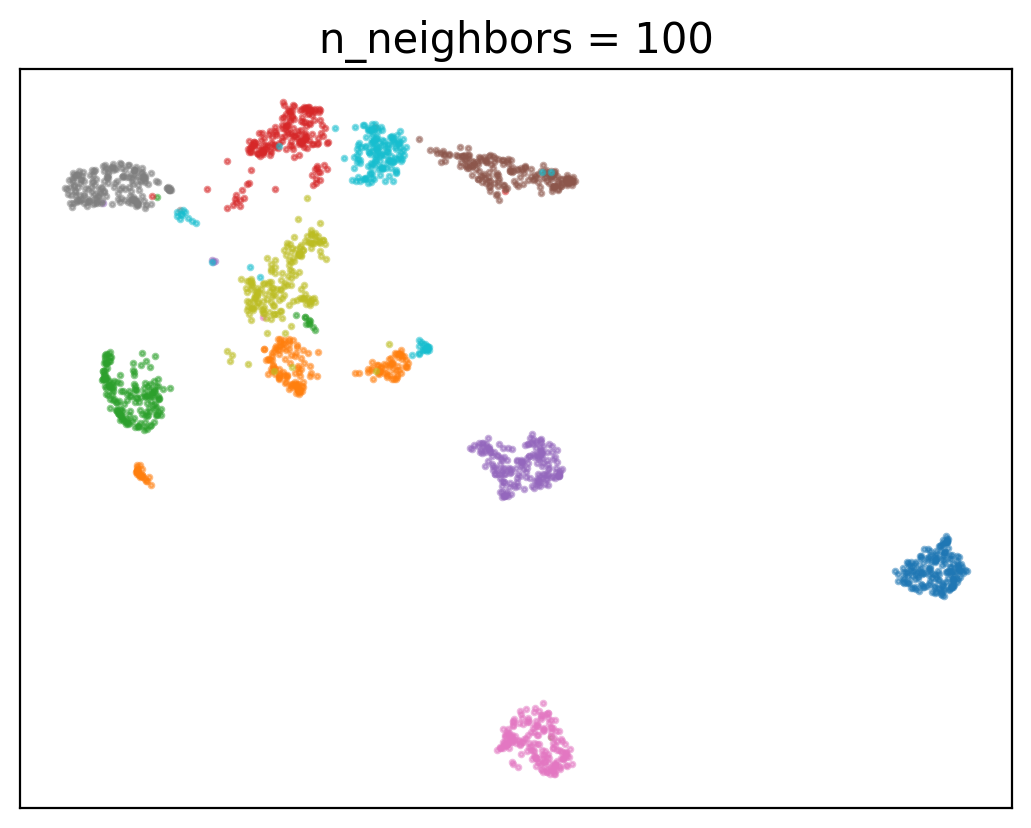

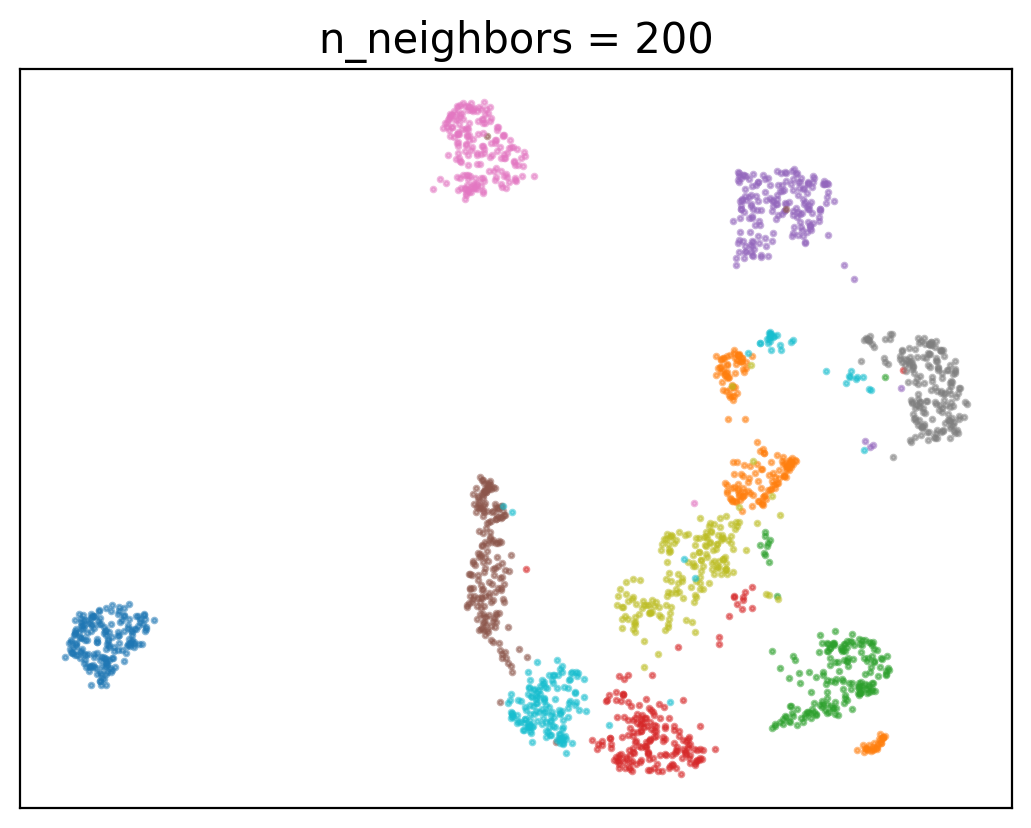

In [12]:
for n in (5, 10, 20, 50, 100, 200):
  title = f"n_neighbors = {n}"
  print(title)
  draw_umap(n_neighbors=n, title=title)

### (2) `min_dist`を変更する
* デフォルトの値は0.1

min_dist = 0.0
min_dist = 0.1
min_dist = 0.25
min_dist = 0.5
min_dist = 0.8
min_dist = 0.99


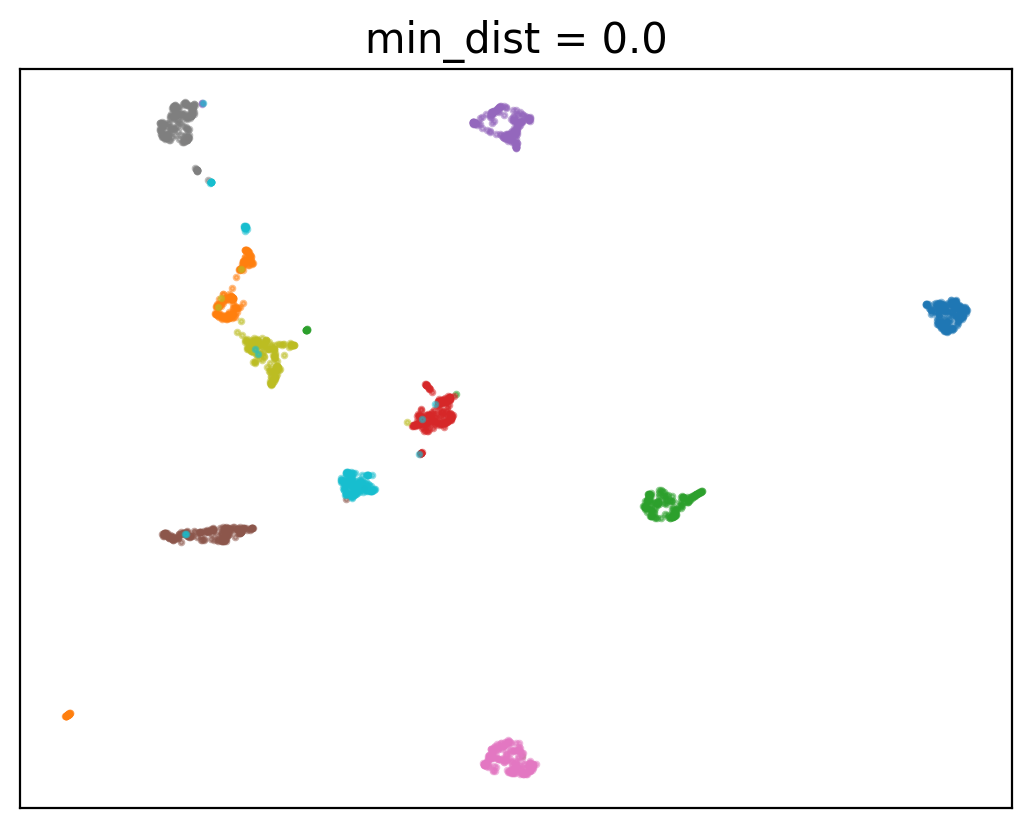

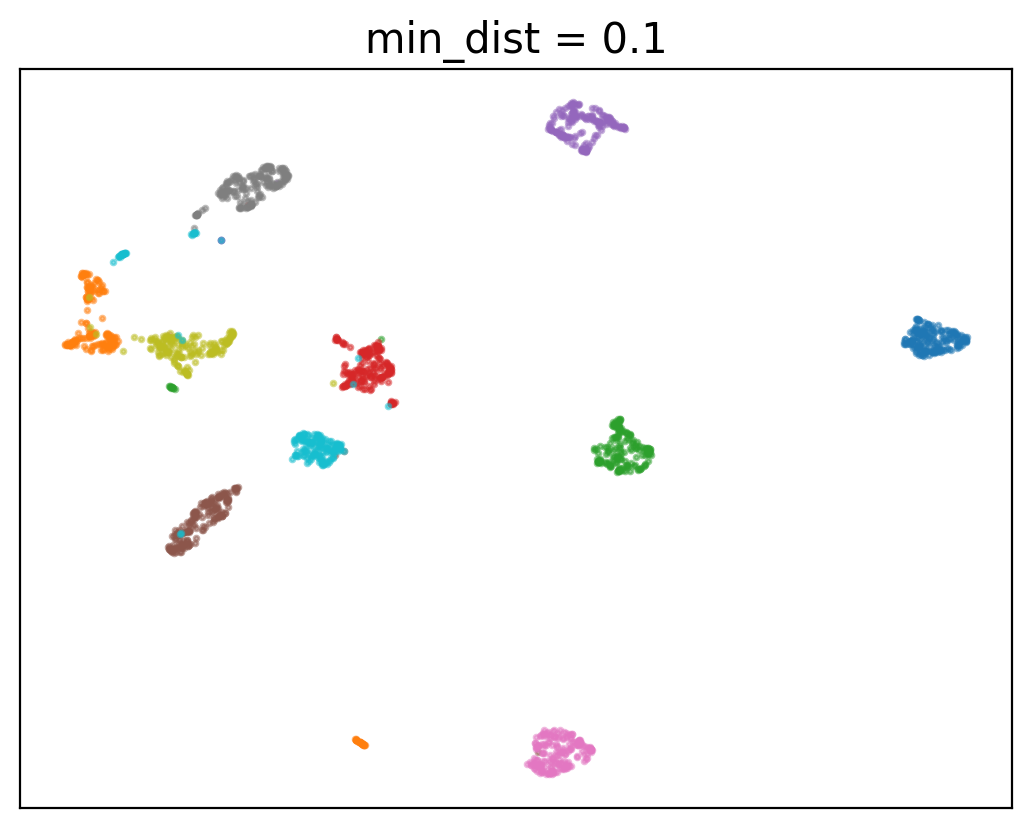

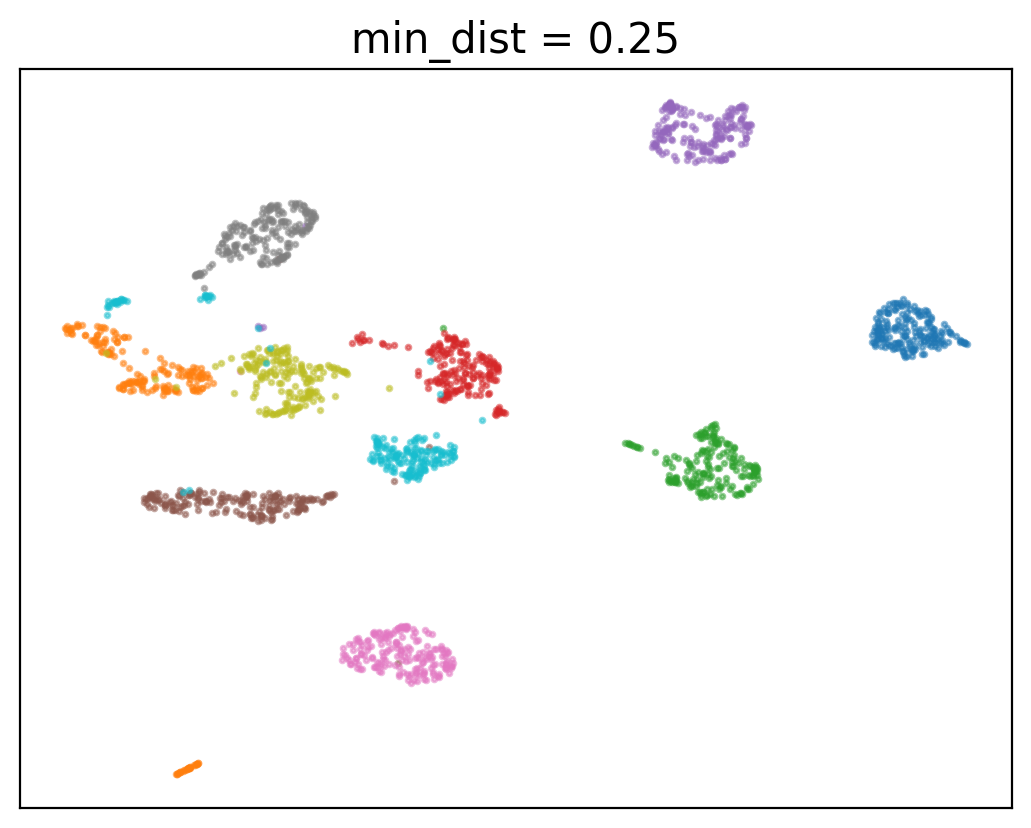

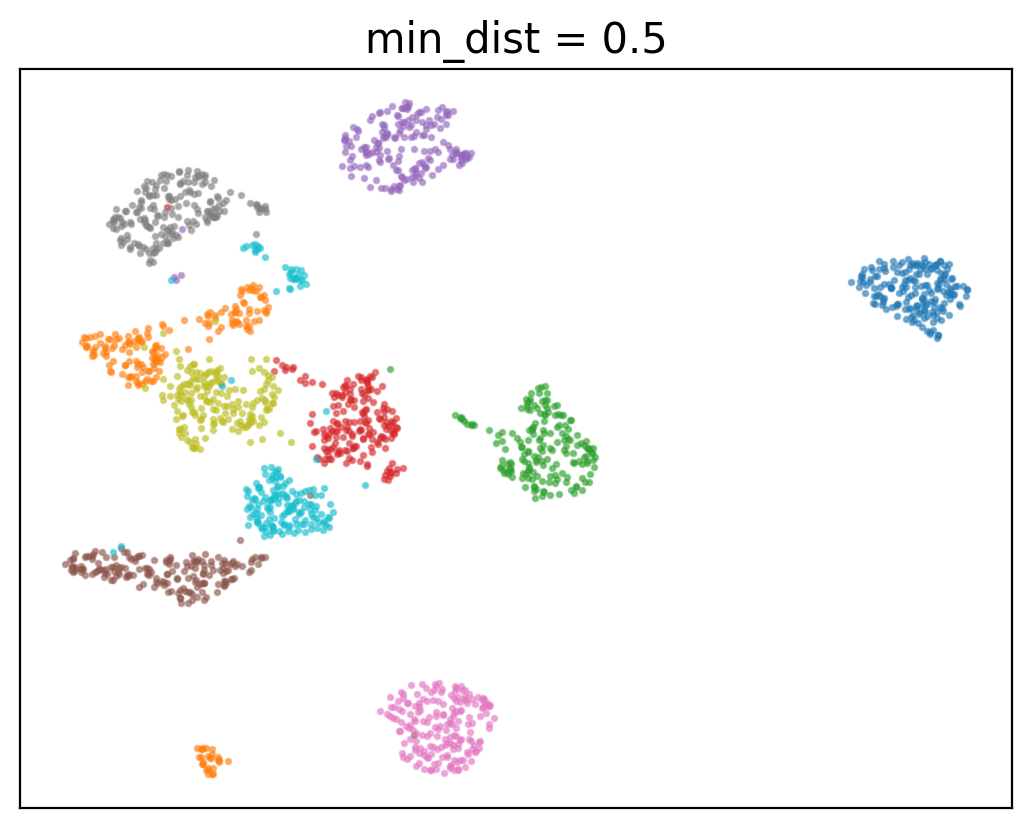

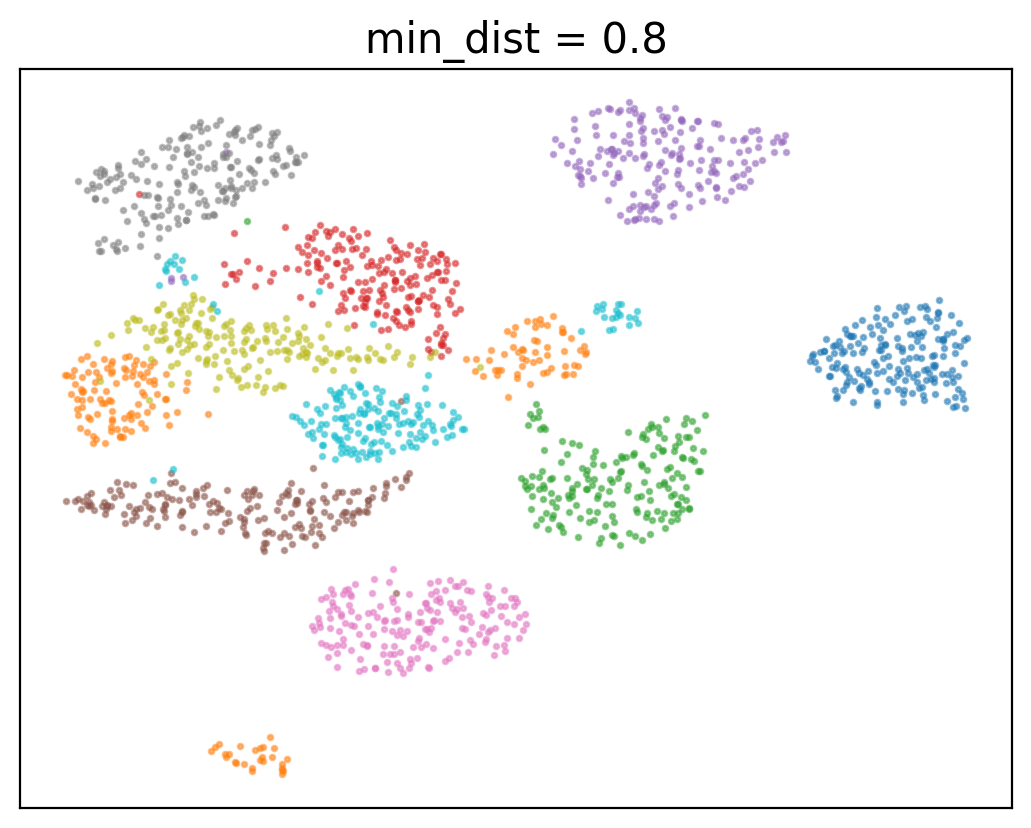

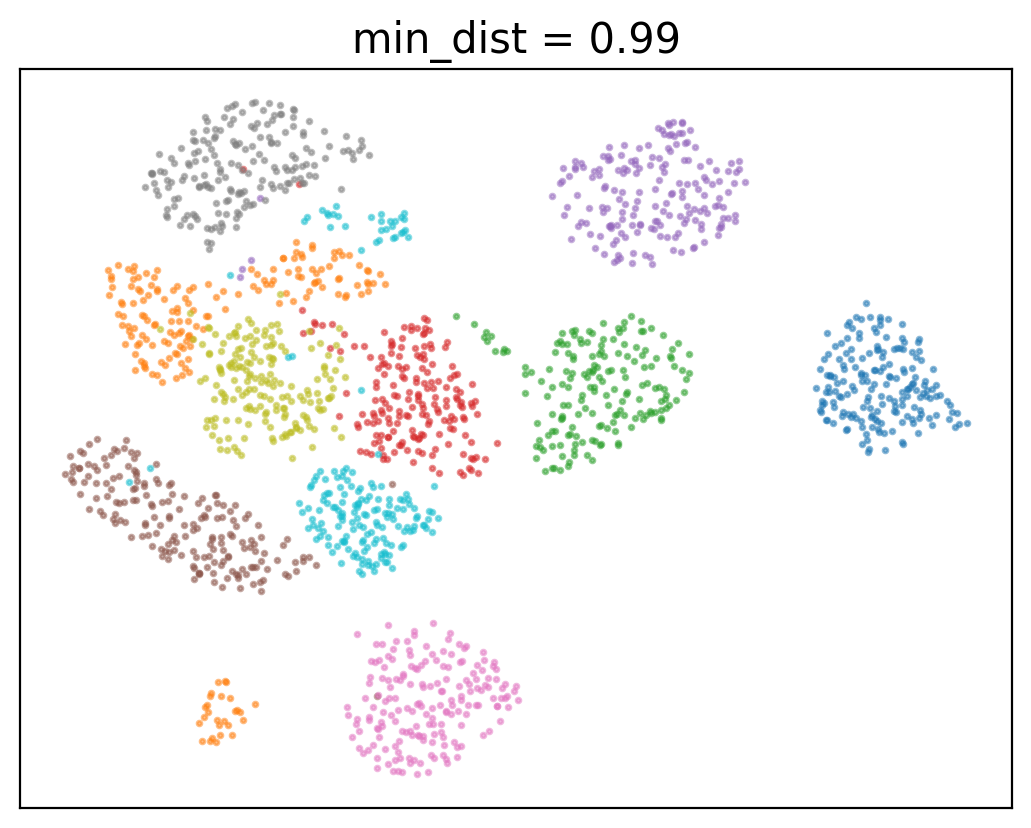

In [13]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
  title = f"min_dist = {d}"
  print(title)
  draw_umap(min_dist=d, title=title)

## t-SNE
* https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
 * パラメータ`perplexity`を変えると可視化がどう変わるか。

### デフォルトの設定で可視化

In [14]:
%%time
reducer = manifold.TSNE(random_state=42)
embedding = reducer.fit_transform(digits.data)

CPU times: user 22.4 s, sys: 156 ms, total: 22.5 s
Wall time: 15 s


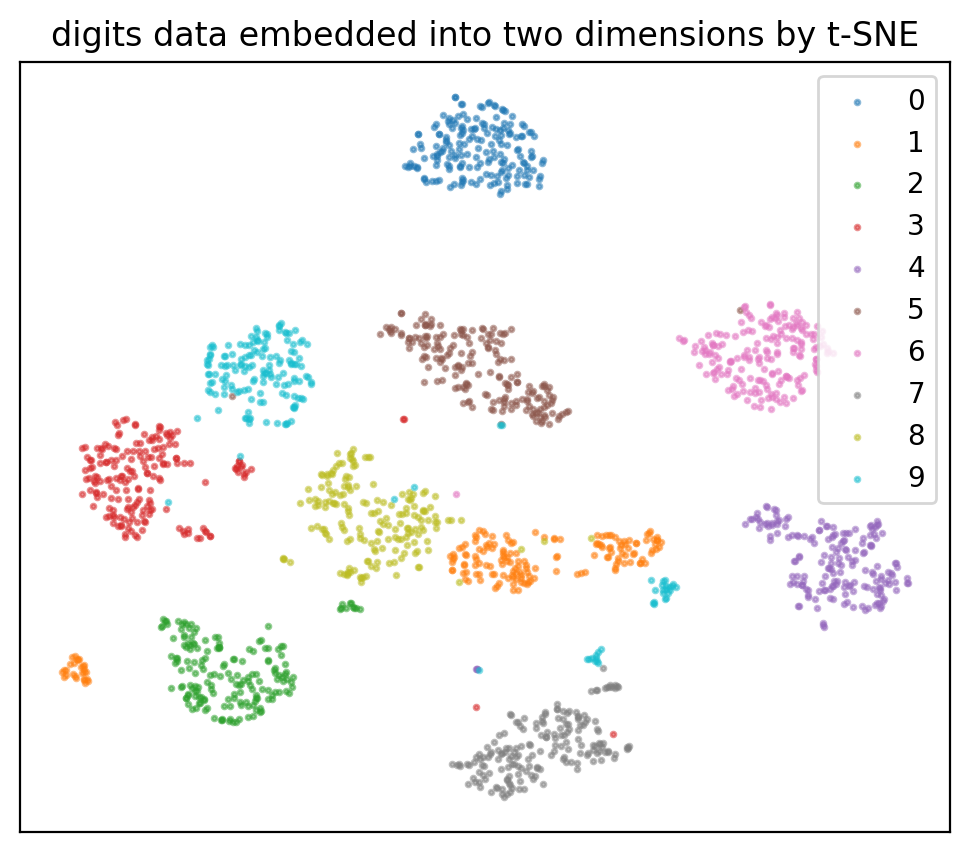

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
scatter_plot(embedding, digits.target)
plt.setp(ax, xticks=[], yticks=[])
plt.legend()
plt.title("digits data embedded into two dimensions by t-SNE");

### `perplexity`を変更する

In [16]:
def draw_tsne(perplexity=30.0, title=""):
  reducer = manifold.TSNE(perplexity=perplexity, random_state=42)
  u = reducer.fit_transform(digits.data)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter_plot(u, digits.target, ax=ax)
  plt.setp(ax, xticks=[], yticks=[])
  plt.legend()
  plt.title(title, fontsize=15);

perplexity = 2
perplexity = 5
perplexity = 10
perplexity = 20
perplexity = 50
perplexity = 100


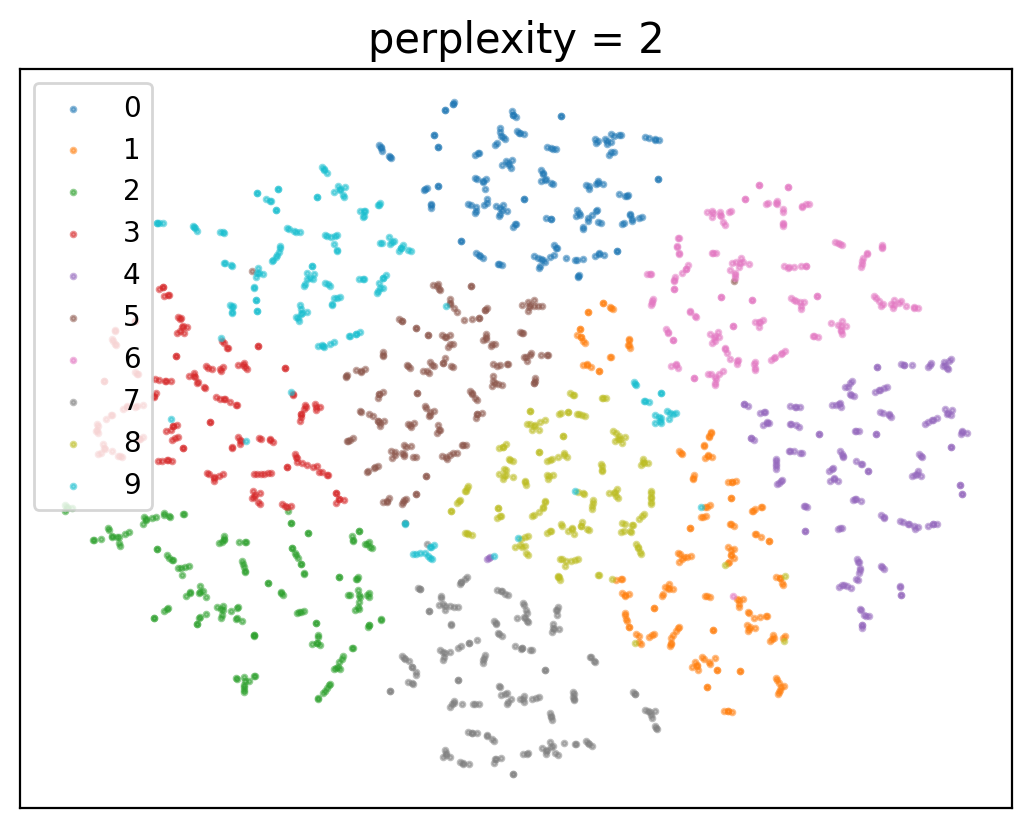

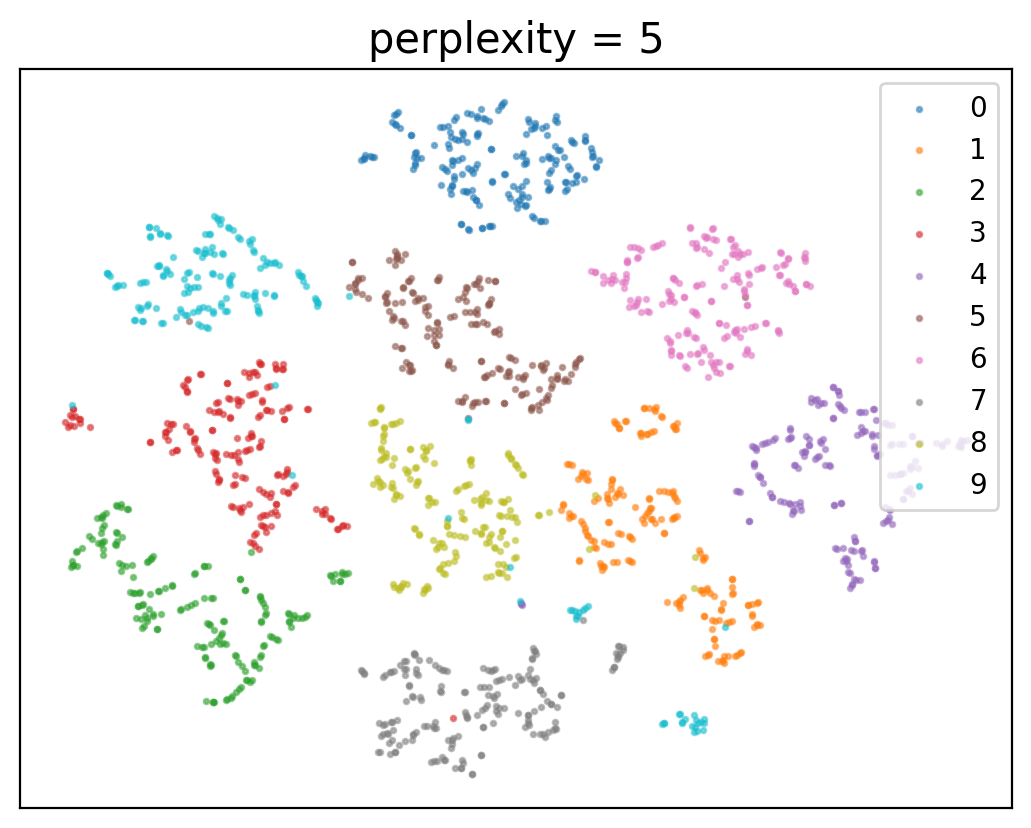

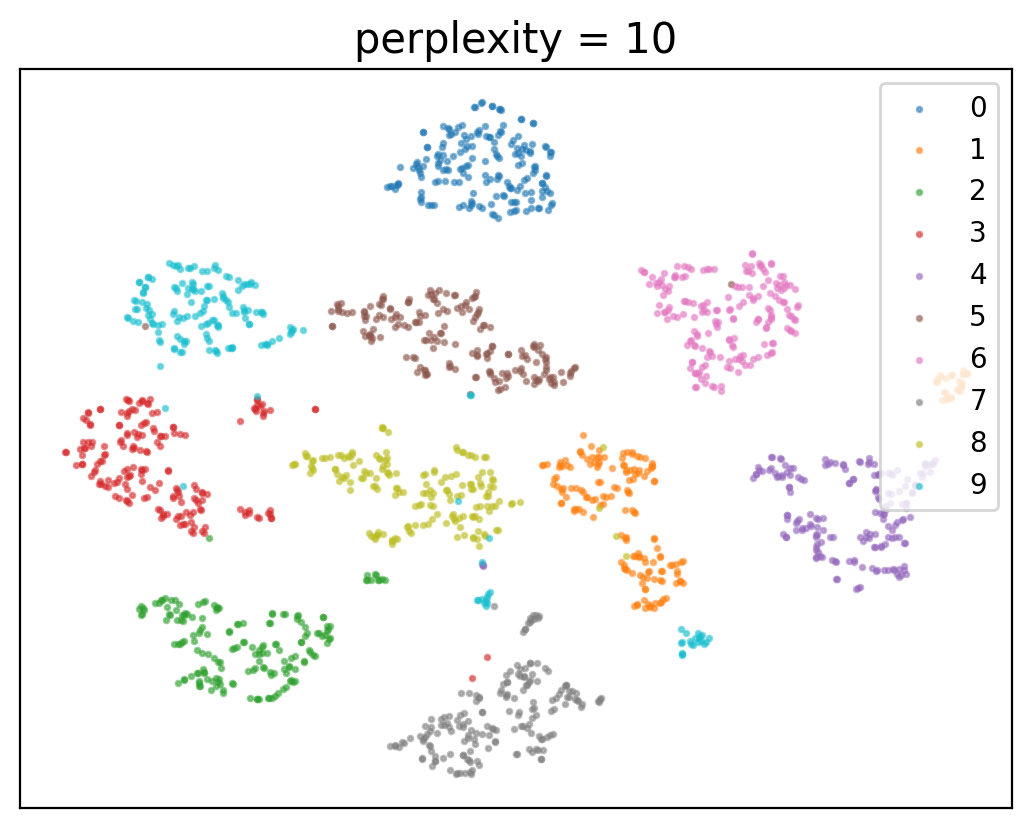

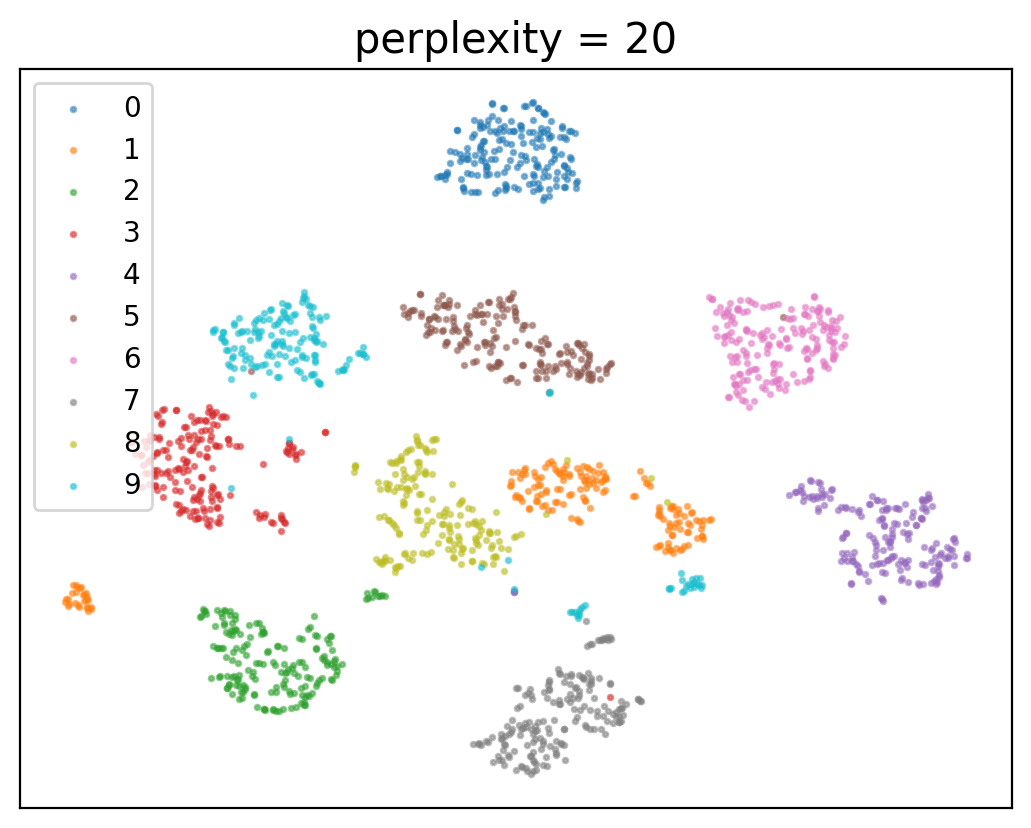

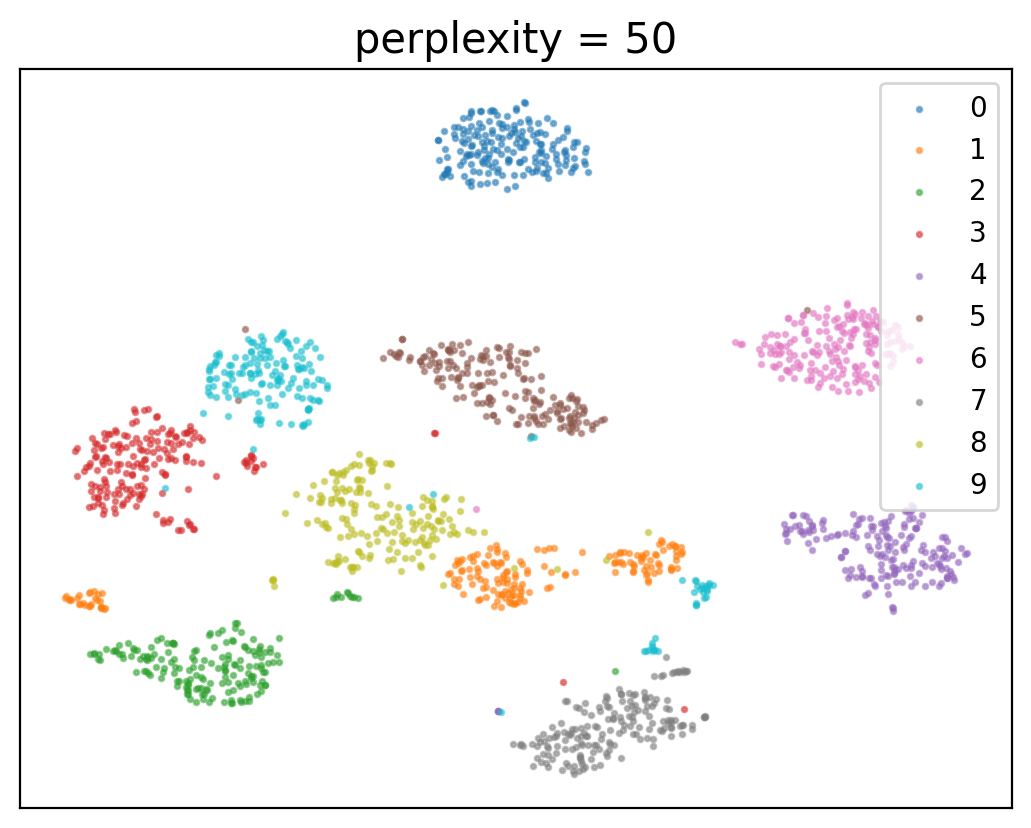

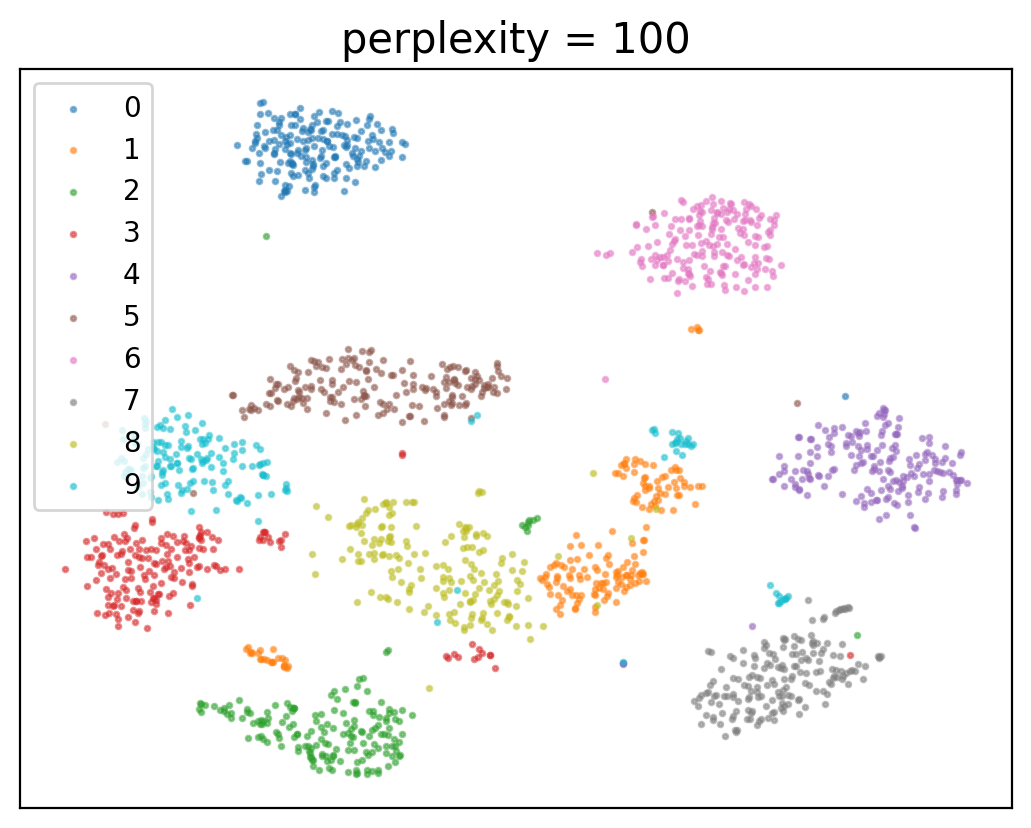

In [17]:
for p in (2, 5, 10, 20, 50, 100):
  title = f"perplexity = {p}"
  print(title)
  draw_tsne(perplexity=p, title=title)

## MDS

### デフォルトの設定で可視化

In [22]:
%%time
reducer = manifold.MDS(normalized_stress=False, random_state=42)
embedding = reducer.fit_transform(digits.data)

CPU times: user 2min 20s, sys: 1min 23s, total: 3min 43s
Wall time: 2min 15s


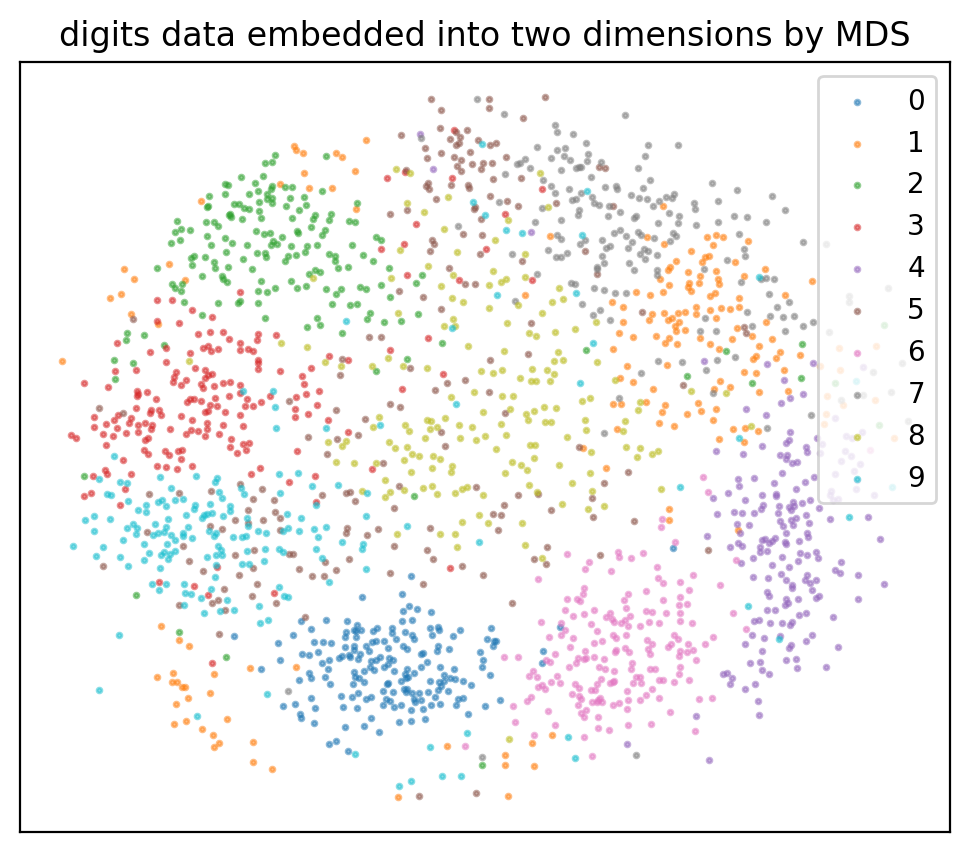

In [23]:
fig, ax = plt.subplots(figsize=(6, 5))
scatter_plot(embedding, digits.target)
plt.setp(ax, xticks=[], yticks=[])
plt.legend()
plt.title("digits data embedded into two dimensions by MDS");

* epsを変更してみたが、今回のデータセットでは、ほとんど変化が見られなかった。

## 考察
* 可視化ツールをデフォルトの設定で使っても構わないか？
* 2次元の可視化において遠いものは遠いと言っていいか？
* 2次元の可視化において近いものは近いと言っていいか？
* 例えば、digits dataに関して、ここまでの可視化を踏まえて、結論して構わないことは、何か？


## 助言
* 初めに結論ありきの、"自分が見たいものだけを見る可視化"にならないよう、注意しよう。
* 最低限、複数の可視化手法を比較し、共通して見られる特徴は何かを確認しよう。